
data : DataFrame
x : label or position, default None

y : label, position or list of label, positions, default None

    Allows plotting of one column versus another

kind : str

        ‘line’ : line plot (default)
        ‘bar’ : vertical bar plot
        ‘barh’ : horizontal bar plot
        ‘hist’ : histogram
        ‘box’ : boxplot
        ‘kde’ : Kernel Density Estimation plot
        ‘density’ : same as ‘kde’
        ‘area’ : area plot
        ‘pie’ : pie plot
        ‘scatter’ : scatter plot
        ‘hexbin’ : hexbin plot

ax : matplotlib axes object, default None

subplots : boolean, default False

    Make separate subplots for each column

sharex : boolean, default True if ax is None else False

    In case subplots=True, share x axis and set some x axis labels to invisible; defaults to True if ax is None otherwise False if an ax is passed in; Be aware, that passing in both an ax and sharex=True will alter all x axis labels for all axis in a figure!

sharey : boolean, default False

    In case subplots=True, share y axis and set some y axis labels to invisible

layout : tuple (optional)

    (rows, columns) for the layout of subplots

figsize : a tuple (width, height) in inches

use_index : boolean, default True

    Use index as ticks for x axis

title : string or list

    Title to use for the plot. If a string is passed, print the string at the top of the figure. If a list is passed and subplots is True, print each item in the list above the corresponding subplot.

grid : boolean, default None (matlab style default)

    Axis grid lines

legend : False/True/’reverse’

    Place legend on axis subplots

style : list or dict

    matplotlib line style per column

logx : boolean, default False

    Use log scaling on x axis

logy : boolean, default False

    Use log scaling on y axis

loglog : boolean, default False

    Use log scaling on both x and y axes

xticks : sequence

    Values to use for the xticks

yticks : sequence

    Values to use for the yticks

xlim : 2-tuple/list
ylim : 2-tuple/list

rot : int, default None

    Rotation for ticks (xticks for vertical, yticks for horizontal plots)

fontsize : int, default None

    Font size for xticks and yticks

colormap : str or matplotlib colormap object, default None

    Colormap to select colors from. If string, load colormap with that name from matplotlib.

colorbar : boolean, optional

    If True, plot colorbar (only relevant for ‘scatter’ and ‘hexbin’ plots)

position : float

    Specify relative alignments for bar plot layout. From 0 (left/bottom-end) to 1 (right/top-end). Default is 0.5 (center)

table : boolean, Series or DataFrame, default False

    If True, draw a table using the data in the DataFrame and the data will be transposed to meet matplotlib’s default layout. If a Series or DataFrame is passed, use passed data to draw a table.

yerr : DataFrame, Series, array-like, dict and str

    See Plotting with Error Bars for detail.

xerr : same types as yerr.

stacked : boolean, default False in line and

    bar plots, and True in area plot. If True, create stacked plot.

sort_columns : boolean, default False

    Sort column names to determine plot ordering

secondary_y : boolean or sequence, default False

    Whether to plot on the secondary y-axis If a list/tuple, which columns to plot on secondary y-axis

mark_right : boolean, default True

    When using a secondary_y axis, automatically mark the column labels with “(right)” in the legend

`**kwds` : keywords

    Options to pass to matplotlib plotting method


### -----------------------Three DIFFERENT WAYS OF PLOTTING IN PANDAS--------------------------------------

#### 1. DF.hist('COL', figsize=(5,3))
#### 2. DF.plot(kind = 'hist',coulmn = 'rating', figsize=(5,3))
#### 3. DF.COL.plot.hist(grid = True)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = sns.load_dataset('tips')

print(data.shape)
print(data.total_bill.max())
data.head()

(244, 7)
50.81


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# ------------------------------------------HIST. GRAPH-------------------------------------

Text(0.5,0,'values of total_bill')

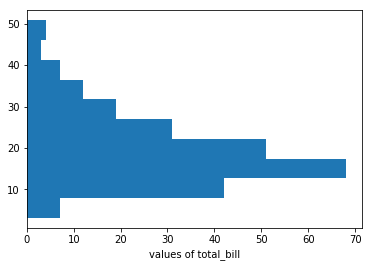

In [3]:
# orientation

data.total_bill.plot(kind = 'hist', bins = 10, orientation = 'horizontal')

# you have to use plt for putting labels, you can not do it simply by using pandas visualization

plt.xlabel('values of total_bill')

Text(0.5,0,'values of total_bill')

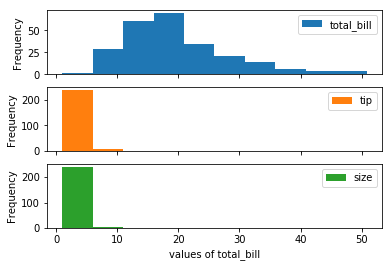

In [46]:
#data.plot(kind = 'line')

data.plot(kind = 'hist', orientation = 'vertical' , stacked = True,subplots= True)
plt.xlabel('values of total_bill')

# ------------------------------------------BAR GRAPH-------------------------------------

Text(0.5,0,'index')

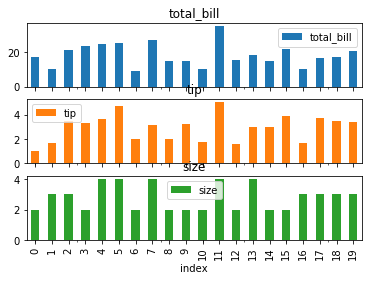

In [47]:
data[:20].plot(kind = 'bar',subplots= True)

plt.xlabel('index')

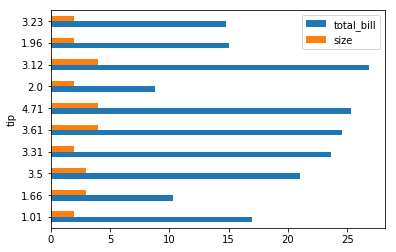

In [15]:
# using barh for horizontal bar

data[:10].plot(x= 'tip', y = ['total_bill','size'], kind = 'barh')

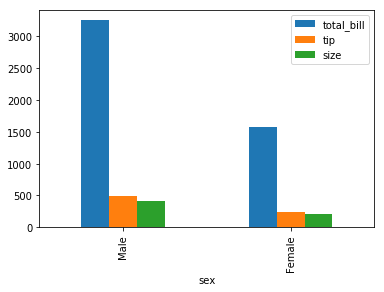

In [17]:
# This can plot categorical(Charecter) variable as well

t = data.groupby(by = 'sex').sum()
t
t.plot(kind = 'bar')

# ------------------------------------------LINE GRAPH-------------------------------------

Text(0.5,0,'index')

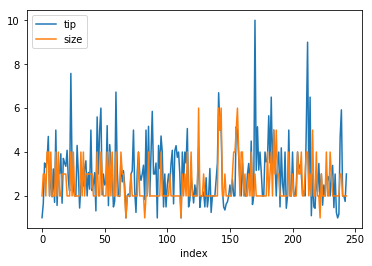

In [11]:
data[['tip','size']].plot(kind = 'line')

plt.xlabel('index')

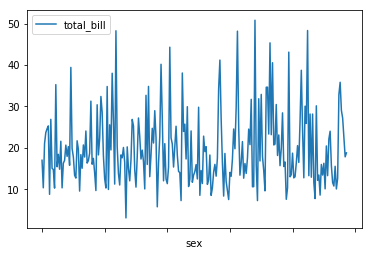

In [14]:
data.plot(kind = 'line', x = 'sex' , y = 'total_bill' )

        total_bill     tip  size
sex                             
Male       3256.82  485.07   413
Female     1570.95  246.51   214


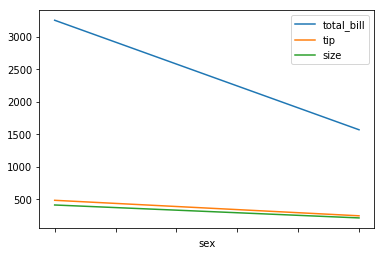

In [16]:
t = data.groupby(by = 'sex').sum()
print(t)
t.plot(kind = 'line')


##### LINE PLOT TRIES TO JOIN ALL POINTS ON X AXIS ACC. TO THEIR INDEXES WHICH CREATES A CLUTTERED PLOT LIKE THIS, SO ITS BTTEER IF WE FIRST SORT X ACCORDINGLY - since now x will always be ascending and hence graph will flow in forward direction

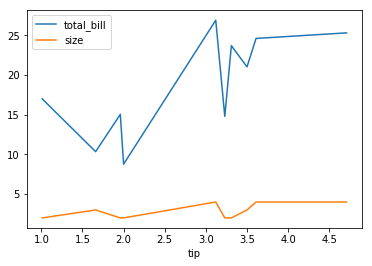

In [41]:
data[:10].sort_values(by = 'tip').plot(x= 'tip', y = ['total_bill','size'], kind = 'line')

# ---------------------------------------------- AREA ------------------------------------------

Text(0.5,0,'index')

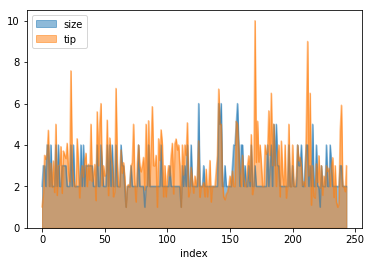

In [39]:
data[['size','tip']].plot(kind = 'area' , stacked = False )

plt.xlabel('index')

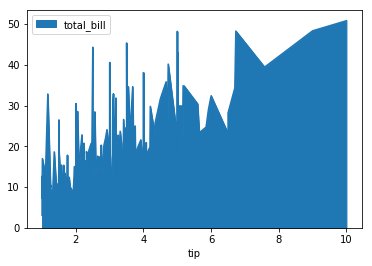

In [57]:
data.sort_values(by = 'tip').plot(x= 'tip', y = ['total_bill'], kind = 'area')

# ---------------------------------------------- SCATTER ------------------------------------

##### scatter plot gives you 3 dimensional info at once

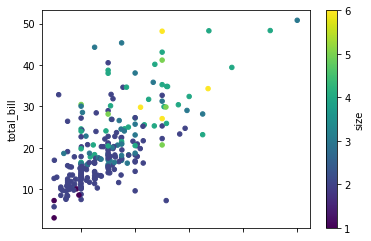

In [37]:
data.plot(kind = 'scatter', x = 'tip', y = 'total_bill', c = 'size',cmap = 'viridis')

#plt.xlabel('total_bill')

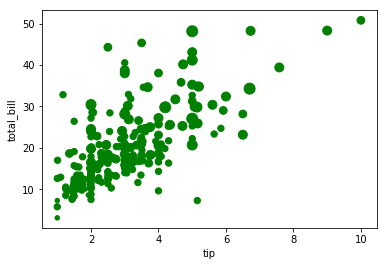

In [49]:
data.plot(kind = 'scatter', x = 'tip', y = 'total_bill', s = data['size']*20 , color = 'g')

#plt.ylabel('total_bill')

# ---------------------------------------------- BOX ------------------------------------

Text(0.5,0,'index')

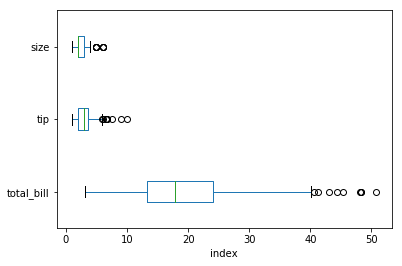

In [51]:
data.plot(kind = 'box', vert = False)
#data.tip.plot(kind = 'box')

plt.xlabel('index')

# ---------------------------------------------- HEXBIN ------------------------------------

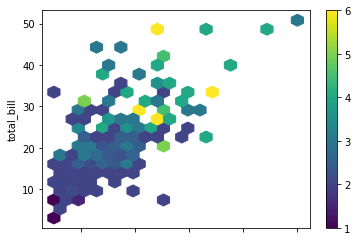

In [88]:
data.plot(kind = 'hexbin', x = 'tip', y = 'total_bill', C =  'size',cmap = 'viridis', gridsize= 20)
#plt.xlabel('index')

# ---------------------------------------------- PIE------------------------------------

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbb2c34588>,
      dtype=object)

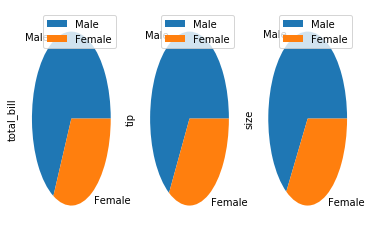

In [102]:
t = data.groupby(by = 'sex').sum()
t
t.plot(subplots = True, kind = 'pie')

Using Layout and Targeting Multiple Axes

The layout of subplots can be specified by the layout keyword. It can accept (rows, columns). The layout keyword can be used in hist and boxplot also. If the input is invalid, a ValueError will be raised.

The number of axes which can be contained by rows x columns specified by layout must be larger than the number of required subplots. If layout can contain more axes than required, blank axes are not drawn. Similar to a NumPy array’s reshape method, you can use -1 for one dimension to automatically calculate the number of rows or columns needed, given the other.

In [130]: df.plot(subplots=True, layout=(2, 3), figsize=(6, 6), sharex=False);



In [ ]:
df.plot(legend=False)
ts.plot(logy=True)

# -----------------------------------------------------------------------------------------------------


In [53]:
print(fig.__class__.__bases__)
matplotlib.figure.Figure.__class__.__bases__

(<class 'matplotlib.artist.Artist'>,)


(object,)

In [45]:
print(axes1.__class__.__bases__)
axes1.__class__

(<class 'matplotlib.axes._base._AxesBase'>,)


matplotlib.axes._axes.Axes

In [14]:
mpl.__class__.__bases__

(object,)

In [12]:
mpl.figure.Figure.__class__

type

In [20]:
import matplotlib



for x,y in matplotlib.__dict__.items():
    print('----START---{}:{}-------END--------'.format(x,y))

----START---__name__:matplotlib-------END--------
----START---__doc__:
This is an object-oriented plotting library.

A procedural interface is provided by the companion pyplot module,
which may be imported directly, e.g.::

    import matplotlib.pyplot as plt

or using ipython::

    ipython

at your terminal, followed by::

    In [1]: %matplotlib
    In [2]: import matplotlib.pyplot as plt

at the ipython shell prompt.

For the most part, direct use of the object-oriented library is
encouraged when programming; pyplot is primarily for working
interactively.  The
exceptions are the pyplot commands :func:`~matplotlib.pyplot.figure`,
:func:`~matplotlib.pyplot.subplot`,
:func:`~matplotlib.pyplot.subplots`, and
:func:`~pyplot.savefig`, which can greatly simplify scripting.

Modules include:

    :mod:`matplotlib.axes`
        defines the :class:`~matplotlib.axes.Axes` class.  Most pylab
        commands are wrappers for :class:`~matplotlib.axes.Axes`
        methods.  The axes module is t